In [1]:
#ques 1

from scipy.optimize import minimize_scalar
def f(x):
  return x**2 + 2*x + 4

result=minimize_scalar(f)
print(result)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 3.0
       x: -0.9999999851900002
     nit: 4
    nfev: 8


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -3.333333333333334
              x: [ 6.667e-01  3.333e-01]
            nit: 2
          lower:  residual: [ 6.667e-01  3.333e-01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-7.778e-01 -4.444e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


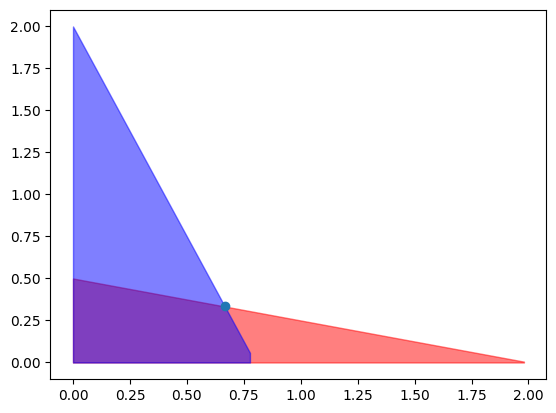

In [7]:
#ques 2 
from  scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt

z=[-3,-4]
a=[[1,4],[5,2]]
b=[2,4]

result=linprog(z,A_ub=a, b_ub=b,method='highs')
print(result)
x_values=np.linspace(0,10,400)
y_values=np.linspace(0,10,400)

plt.fill_between(x_values,0,(2-x_values)/4 ,where=(2-x_values)/4>=0,color='red',alpha=0.5)
plt.fill_between(x_values,0,(4-5*x_values)/2,where=(4-5*x_values)/2>=0,color='blue',alpha=0.5)
plt.scatter(result.x[0],result.x[1])

In [10]:
import sympy as sp
import numpy as np
x1,x2=sp.symbols('x1,x2')
f = 100 * (x2**2 - x1**2)**2 + (1 - x1)**2
grad=[sp.diff(f,x1),(f,x2)]
hessian=sp.hessian(f,(x1,x2))
print(grad)
print(hessian)

[-400*x1*(-x1**2 + x2**2) + 2*x1 - 2, ((1 - x1)**2 + 100*(-x1**2 + x2**2)**2, x2)]
Matrix([[1200*x1**2 - 400*x2**2 + 2, -800*x1*x2], [-800*x1*x2, -400*x1**2 + 1200*x2**2]])


In [18]:
from scipy.optimize import minimize
import numpy as np
def f(x):
    return -10*np.cos(np.pi*x-2.2) + x*(x+1.5)

result=minimize(f,[0.0])
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -8.500986423557436
        x: [ 6.714e-01]
      nit: 6
      jac: [ 0.000e+00]
 hess_inv: [[ 9.971e-03]]
     nfev: 18
     njev: 9


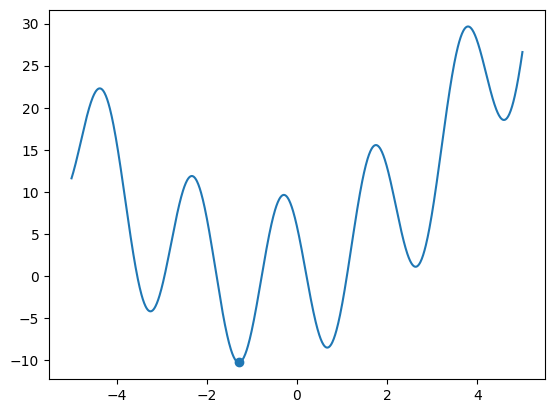

In [27]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return -10*np.cos(np.pi*x-2.2) + x*(x+1.5)

x=np.linspace(-5,5,1000)
y=f(x)

optimal_x = x[np.argmin(y)]
optimal_y = min(y)
plt.plot(x,y)
plt.scatter(optimal_x,optimal_y)

In [31]:
from scipy.optimize import minimize
def f(x):
    return x[0]**2 + x[1]**2
def const(x):
    return x[0]+2*x[1]-3

constraint=({'type':'ineq','fun':const})

initial_guess = [0.0, 0.0]
result=minimize(f,[0,0],constraints=constraint)
print(result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.8000000000000016
       x: [ 6.000e-01  1.200e+00]
     nit: 3
     jac: [ 1.200e+00  2.400e+00]
    nfev: 10
    njev: 3


In [34]:
def f(x):
    return x**2 - 4*x + 4

def f_prime(x):
    return 2*x-4

def f_dp(x):
    return 2

x0=4

tolerance =1e-6

for i in range(100):
    x1=x0-f_prime(x0)/f_dp(x0)
    
    if abs(x1-x0)<tolerance:
        break
    x0=x1

print(x0)



2.0


In [36]:
#Ques 8
import sympy as sp

def f(x):
    return x**2 + 5*x + 6
def f_prime(x):
    return 2*x +5

l_r=0.1
initial_x=0
for i in range(1000):
    gradient = f_prime(initial_x)
    initial_x = initial_x - l_r * gradient
    
print(initial_x)

-2.499999999999999


In [ ]:
import numpy as np

def objective_function(x):
    return x**2 + 4*x + 4

def gradient(x):
    return 2*x + 4

def steepest_descent(initial_guess, learning_rate, tolerance):
    x = initial_guess

    while True:
        grad_value = gradient(x)

        if np.linalg.norm(grad_value) < tolerance:
            break  # Convergence criteria met

        x = x - learning_rate * grad_value

    return x, objective_function(x)

# Initial guess, learning rate, and tolerance
initial_guess = np.array([0.0])
learning_rate = 0.1
tolerance = 1e-6

result = steepest_descent(initial_guess, learning_rate, tolerance)

print("Optimal solution: x =", result[0])


In [39]:
#Taylor polynomial
import sympy as sp


x, a = sp.symbols('x a')
f = sp.sin(x)  


taylor_series = sp.series(f, x, a, 5).removeO()

print("Taylor Series up to degree 5:", taylor_series)
a_value = 0
taylor_poly = taylor_series.subs(a, a_value)

print("\nTaylor Polynomial at x =", a_value, ":", taylor_poly)


Taylor Series up to degree 5: (-a + x)**4*sin(a)/24 - (-a + x)**3*cos(a)/6 - (-a + x)**2*sin(a)/2 + (-a + x)*cos(a) + sin(a)

Taylor Polynomial at x = 0 : -x**3/6 + x


In [40]:
import sympy as sp

x,a=sp.symbols('x a')
f=sp.sin(x)

taylor=sp.series(f,x,a,5)
print(taylor)


<function print(*args, sep=' ', end='\n', file=None, flush=False)>